In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = "https://drive.google.com/open?id=1dODoVwyhIMNeqii0eEUYkYaoKPZMqsD7"
fluff, id = link.split('=')

In [0]:
import pandas as pd

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('cleaned_dataset.csv')  
df = pd.read_csv('cleaned_dataset.csv')

transcripts = df["transcript"]

In [5]:
# title = df["title"].tolist()
# print(title)
!pip install num2words

     |████████████████████████████████| 102kB 2.4MB/s 


In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer 
from nltk.tokenize import word_tokenize
from num2words import num2words

In [0]:
def change_to_lowercase(sentence):
    new_text = ""
    for word in sentence.split(" "):
        new_text += " " + word.lower()
    return new_text

def remove_stopwords(sentence,sw):
    new_text = ""
    for word in sentence.split(" "):
        if word not in sw:
            new_text += " " + word
    return new_text

def remove_punctuation(sentence,symbols):
    for i in symbols:
        sentence = sentence.replace(i,' ')
    return sentence.replace("'", "")

def remove_single_char(sentence):
    new_text = ""
    for w in sentence.split(" "):
        if len(w) > 1:
            new_text += " " + w
            
    return new_text

def perform_stemming(sentence,stemmer):
    new_text = ""
    for word in sentence.split(" "):
        new_text += " " + stemmer.stem(word)
    return new_text

def convert_numbers(sentence):
    new_text = ""
    for word in sentence.split(" "):
        if word.isnumeric():
            word = num2words(word)
        new_text += " " + word
        
    return new_text

def get_df(transcript_list):
    DF ={}
    for i in range(len(transcript_list)):
        tokens = transcript_list[i]
        for w in tokens.split(" "):
            try:
                DF[w].add(i)
            except:
                DF[w] = {i}
    return DF



In [0]:
import numpy as np
from nltk.corpus import stopwords

sw = stopwords.words('english')
symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n,"

transcript_list = []

for i, script in enumerate(transcripts):
    sentences = script.split(".")
    sentences = np.char.lower(sentences)
    cleaned_script = ""
    one_word_cleaned_script = ""
    for sentence in sentences:
        sentence = change_to_lowercase(sentence)
        #sentence = remove_stopwords(sentence,sw)
        sentence = remove_punctuation(sentence,symbols)
        #sentence = remove_single_char(sentence)
        #sentence = perform_stemming(sentence,stemmer)
        sentence = convert_numbers(sentence)
        cleaned_script += sentence
    transcript_list.append(cleaned_script)

In [0]:
#Tokenizing

transcript_list_tokennised = [transcript.split(" ") for transcript in transcript_list]
new_transcript_list_tokennised = []
for transcript in transcript_list_tokennised:
    list_of_tokens = []
    for word in transcript:
        if word != "" and word != "—" and len(word)>1:
            list_of_tokens.append(word)
    new_transcript_list_tokennised.append(list_of_tokens)

In [0]:
from collections import Counter

def get_pdf(new_transcript_list_tokennised):
    # get num docs with term
    term_list = []
    for d in new_transcript_list_tokennised:
        #Get Unique terms
        term_list += list(set(d))
    counter = Counter(term_list)
    for k,v in counter.items():
        counter[k] = np.exp(v/len(new_transcript_list_tokennised))
        
    return counter

def get_tf(tokenised_doc):
    counter = Counter(tokenised_doc)
    for term in counter.keys():
        counter[term] = counter[term] / len(tokenised_doc)
    return counter


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

#Most frequently occuring Tri-grams
def get_top_n3_words(corpus):
    vec1 = CountVectorizer(ngram_range=(3,3)).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq

In [0]:
cleaned_list_transcripts = [transcript.replace('\\',"") for transcript in transcript_list]
top3_words = get_top_n3_words(cleaned_list_transcripts)

In [0]:
def get_filtered_word_list(topn_words):
    topn_words_list = []
    for word in topn_words:
        if word[1]>5:
            topn_words_list.append(word)
        else:
            break

    return topn_words_list

In [0]:
top3_words_list = get_filtered_word_list(top3_words)

In [0]:
top3words_counter = 0

for words in top3_words_list:
    top3words_counter+= words[1]

In [0]:
top_3_words_tokenised = [word[0] for word in top3_words_list]

In [0]:
def get_n_pdf(top_words,count):
    pdf_dict = {}
    for item in top_words:
        pdf_dict[item[0]] = np.exp(item[1]/count)
    return pdf_dict

In [0]:
pdf_counter3_obj = get_n_pdf(top3_words_list,2340)

In [0]:
def get_tf(tokenised_doc):
    counter = Counter(tokenised_doc)
    for term in counter.keys():
        counter[term] = counter[term] / len(tokenised_doc)
    return counter

In [0]:
def get_terms_list(transcript_list_tokennised):
    terms_list = []
    for transcript in transcript_list_tokennised:
        terms_list += set(transcript)

    return terms_list

In [0]:
three_word_terms_list = get_terms_list(top_3_words_tokenised)

In [0]:
def get_transcript_tokenised_list(top_n_words_tokenised,transcripts):
    ret_list = []
    for index,transcript in enumerate(transcripts):
        transcript_list = []
        for word in top_n_words_tokenised:
            if word in transcript:
                transcript_list.append(word)
        ret_list.append(transcript_list)
        
    return ret_list

In [0]:
new_transcript_list_3tokenised = get_transcript_tokenised_list(top_3_words_tokenised,cleaned_list_transcripts)

In [0]:
tf_pdf3_dict = {}

for index, doc in enumerate(new_transcript_list_3tokenised):
    tf_pdf3_dict[index] = {}
    ret_dict = get_tf(doc)
    for key,val in ret_dict.items():
        tf_pdf3_dict[index][key] = val*pdf_counter3_obj[key] 
    for word in three_word_terms_list:
        if word not in ret_dict.keys():
            tf_pdf3_dict[index][word] = 0     

In [0]:
def get_norm_value(tf_pdf_dict):
    word_score_dict = {}
    for key,value in tf_pdf_dict.items():
        for word, score in value.items():
            if word in word_score_dict.keys():
                word_score_dict[word] += score
            else:
                word_score_dict[word] = score
    return word_score_dict

In [0]:
total_norm_val_pdf3_dict = get_norm_value(tf_pdf3_dict)

In [0]:
tf_pdf3_list = []

for k,v in tf_pdf3_dict.items():
    tf_pdf3_list.append(v)

In [29]:
df_features_3 = pd.DataFrame(tf_pdf3_list)
df_features_3.fillna(0)

,one of the,two thousand and,you can see,going to be,we need to,we have to,some of the,in two thousand,look at the,around the world,out of the,to talk about,thank you very,you very much,that we can,and it was,you look at,not going to,in terms of,all of the,if you look,of the most,at the end,by the way,have to be,and he said,and then we,all the time,to be the,and so on,is that we,it would be,if you want,what do you,the people who,the way we,that we are,so you can,the idea of,as you can,...,the street so,to me theres,be better and,far this is,the middle which,three two one,time we see,and was standing,the microscopic life,right so this,knew it we,or something but,the internet which,be and it,eight and half,you there is,live longer and,years and was,the data scientists,the road the,immune system so,is long time,good thing and,and again that,old and we,luther king jr,the country this,so picked up,the city the,an idea meritocracy,him what was,laughter and think,but do think,do think about,job and then,this network and,and then said,to celebrate and,do and when,so took the
0,0.004909,0.003615,0.003254,0.003018,0.002878,0.002635,0.002376,0.002322,0.002311,0.002271,0.002225,0.002133,0.002127,0.002123,0.002123,0.002115,0.002063,0.002061,0.002033,0.002026,0.001993,0.001961,0.001943,0.001930,0.001908,0.001894,0.001894,0.001892,0.001885,0.001878,0.001867,0.001865,0.001860,0.001859,0.001852,0.001851,0.001845,0.001839,0.001834,0.001831,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.006454,0.000000,0.000000,0.003968,0.000000,0.003464,0.003124,0.000000,0.000000,0.000000,0.002925,0.002805,0.002797,0.002792,0.000000,0.000000,0.000000,0.000000,0.000000,0.002664,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002411,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.005176,0.000000,0.000000,0.000000,0.000000,0.000000,0.002505,0.000000,0.000000,0.000000,0.000000,0.000000,0.002243,0.002239,0.000000,0.002230,0.000000,0.002173,0.000000,0.000000,0.000000,0.000000,0.002049,0.002035,0.002012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001967,0.001961,0.001960,0.001953,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.005734,0.000000,0.000000,0.003526,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002485,0.002480,0.000000,0.000000,0.000000,0.000000,0.002375,0.000000,0.000000,0.002291,0.002269,0.002255,0.000000,0.000000,0.000000,0.002210,0.000000,0.000000,0.000000,0.000000,0.002173,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.004507,0.003319,0.002988,0.000000,0.000000,0.002419,0.000000,0.000000,0.002122,0.000000,0.000000,0.000000,0.001953,0.001949,0.000000,0.001942,0.001894,0.000000,0.000000,0.000000,0.001830,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001707,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = "https://drive.google.com/open?id=1gAEfY0SiWVWovW6buJkox8mQilsA7xl0"
fluff, id = link.split('=')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('exported.csv')  
target_df = pd.read_csv('exported.csv')

In [0]:
target_y = target_df["normalised_count_per_view"].values
target_y=target_y.astype('int')

In [0]:
df_features_3 = df_features_3.fillna(0)

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

feature_to_pass_3 = df_features_3.values.astype('float64')
X_new_3 = SelectKBest(chi2, k=1000).fit(feature_to_pass_3,target_y)

In [0]:
cols = X_new_3.get_support(indices=True)


features_df_new = df_features_3.iloc[:,cols]

In [66]:
features_df_new

,one of the,you can see,we need to,we have to,some of the,around the world,thank you very,you very much,not going to,the people who,so you can,as you can,can see the,all the way,want to talk,to say that,the problem is,the world is,we think about,and we were,im trying to,the whole thing,oh my god,for the future,if they dont,if they do,me of the,and the girl,have an interest,applause that was,im going to,in the world,the united states,in the last,two hundred and,going to show,and im going,thank you so,you so much,to focus on,...,have an interesting,just take it,of us so,ten minutes and,of her family,we can extract,our sun and,outside in the,you now what,but the really,the page and,the long axis,to detect the,this ones called,result of these,process and to,magnetic resonance imaging,an integral part,integral part of,the book as,we all feel,you thank you,peoples lives and,of animals and,whole world to,of them got,to the border,ha ha ha,common form of,this data is,to design new,your back and,this question we,their home and,yourself and then,and then found,the painting and,war and it,up with way,black hole and
0,0.004909,0.003254,0.002878,0.002635,0.002376,0.002271,0.002127,0.002123,0.002061,0.001852,0.001839,0.001831,0.001814,0.001801,0.001777,0.00177,0.001748,0.001735,0.001727,0.0017,0.001661,0.001653,0.001651,0.001628,0.001601,0.001581,0.001578,0.001572,0.00157,0.00157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.006454,0.000000,0.000000,0.003464,0.003124,0.000000,0.002797,0.002792,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.002184,0.000000,0.000000,0.000000,0.000000,0.000000,0.002075,0.000000,0.00000,0.00000,0.004845,0.003989,0.003172,0.002495,0.002375,0.002360,0.002308,0.002222,0.002193,0.002191,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.005176,0.000000,0.000000,0.000000,0.002505,0.000000,0.002243,0.002239,0.002173,0.001953,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.001843,0.000000,0.000000,0.0000,0.000000,0.001743,0.000000,0.000000,0.000000,0.000000,0.001664,0.000000,0.00000,0.00000,0.003886,0.003199,0.002544,0.000000,0.001905,0.001893,0.000000,0.001782,0.001759,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005734,0.000000,0.000000,0.000000,0.000000,0.000000,0.002485,0.002480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.001940,0.000000,0.000000,0.001901,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.004305,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.004507,0.002988,0.000000,0.002419,0.000000,0.000000,0.001953,0.001949,0.000000,0.000000,0.000000,0.000000,0.001665,0.001654,0.000000,0.00000,0.000000,0.001593,0.001585,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.003383,0.002785,0.002215,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

<BarContainer object of 1000 artists>

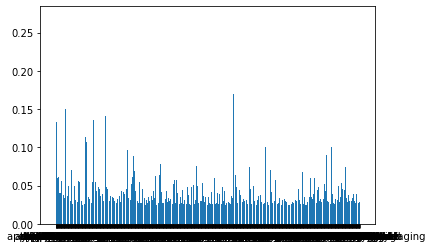

In [67]:
import matplotlib.pyplot as plt

plt.bar(features_df_new.columns, X_new_3.scores_[cols])

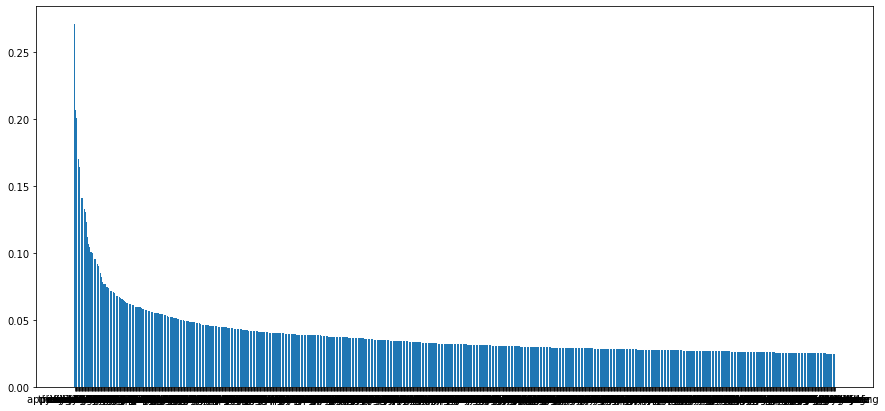

In [68]:
sorted_k_features = list(sorted(list(zip(features_df_new.columns, X_new_3.scores_[cols])), key=lambda x: x[1], reverse=True))
features, scores = list(zip(*sorted_k_features))

plt.figure(figsize=(15, 7))
plt.bar(features, scores)
plt.show()

In [0]:
selected_scores = [score for score in scores if score > 0.05]

In [70]:
len(selected_scores)

142

In [0]:
X_new_3 = SelectKBest(chi2, k=142).fit(feature_to_pass_3,target_y)

cols = X_new_3.get_support(indices=True)

features_df_new = df_features_3.iloc[:,cols]

In [74]:
features_df_new

,one of the,you can see,we need to,we have to,thank you very,you very much,the people who,so you can,as you can,can see the,and we were,im trying to,the whole thing,oh my god,im going to,the united states,and im going,thought to myself,this is the,percent of the,to show you,applause thank you,five percent of,we can see,the very first,show you what,of my work,of the design,on top of,more likely to,in this country,the cost of,im interested in,and this is,so this is,in the united,the size of,would like to,you see the,can use the,...,of your head,you bring the,it all wrong,in central park,you doing here,are not worthy,to stand on,you may ask,the body and,interact with the,image of the,of the body,here we see,today im going,music this is,laughter thank you,in the solar,of light and,older than the,of music and,for the night,the track and,in three minutes,of the camera,around the house,area where the,it might take,for twelve years,science and art,my work as,wanted to create,but now the,into the environment,the next project,video of what,an exercise in,as an artist,and with it,music thank you,the book as
0,0.004909,0.003254,0.002878,0.002635,0.002127,0.002123,0.001852,0.001839,0.001831,0.001814,0.0017,0.001661,0.001653,0.001651,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.006454,0.000000,0.000000,0.003464,0.002797,0.002792,0.000000,0.000000,0.000000,0.000000,0.0000,0.002184,0.000000,0.000000,0.004845,0.003172,0.002308,0.002098,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.005176,0.000000,0.000000,0.000000,0.002243,0.002239,0.001953,0.000000,0.000000,0.000000,0.0000,0.000000,0.001743,0.000000,0.003886,0.002544,0.000000,0.000000,0.003644,0.002282,0.00215,0.001931,0.001862,0.001853,0.001727,0.001718,0.001681,0.001665,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005734,0.000000,0.000000,0.000000,0.002485,0.002480,0.000000,0.000000,0.000000,0.000000,0.0000,0.001940,0.000000,0.000000,0.004305,0.000000,0.000000,0.000000,0.000000,0.002529,0.00000,0.000000,0.002063,0.000000,0.000000,0.000000,0.000000,0.000000,0.002052,0.001996,0.001963,0.001943,0.001869,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.004507,0.002988,0.000000,0.002419,0.001953,0.001949,0.000000,0.000000,0.000000,0.001665,0.0000,0.000000,0.000000,0.000000,0.003383,0.002215,0.000000,0.000000,0.003173,0.001987,0.00000,0.000000,0.000000,0.001613,0.000000,0.000000,0.000000,0.000000,0.001613,0.000000,0.000000,0.000000,0.000000,0.002927,0.002064,0.001784,0.001686,0.001651,0.001626,0.001457,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [0]:
from google.colab import files

features_df_new.to_csv('features_trigram.csv')

files.download('features_trigram.csv')